12. Дифференциальные уравнения. Робин Гуд
Робин Гуд бросает камень с привязанным к нему письмом через бойницу крепостной стены в открытое окно, стоящего за ней замка:

                    стена                    замок
                    _____ 
                   [     ]                  ______ 
                   [     ]                 [      ]
                   [_____]                 [      ]
                   бойница                 [      ]
                    _____                  [      ]
                   [     ]                 [      ]
                   [     ]                   окно ]
                   [     ]                 [      ]
                   [     ]                 [      ]
.                  [     ]                 [      ]
 \0 _              [     ]                 [      ]
  I                [     ]                 [      ]
 / \               [     ]                 [      ]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Смоделируйте полет камня с помощью функции integrate.ode. Рассмотрите следующие события:

1) камень упал на землю, не долетев до окна (либо до, либо после стены);
2) камень не попал в бойницу (ударился о стену);
3) камень застрял в бойнице (стукнулся о <<пол>> или <<потолок>> бойницы и упал внутри нее);
4) камень стукнулся о стену замка (не попав в окно);
5) камень попал в окно (для простоты считаем, что и крепостная стена, и замок очень высокие и сверху через них камень перебросить нельзя). При наступлении каждого из этих событий вычисления прекращаются.

Написать функцию, на вход которой подаются:

1) параметры: масса камня, расстояние от Робин Гуда до стены, толщину стены (равную длине бойницы), расстояние от земли до бойницы и высоту бойницы, расстояние от стены до замка, расстояние от земли до окна и высоту окна,

2) начальные условия: угол броска и начальную скорость камня.

Программа должна отображать «вид сбоку» (многоугольники можно нарисовать с помощью функций matplotlib.patches.Patch) и траекторию полета.

# Решение


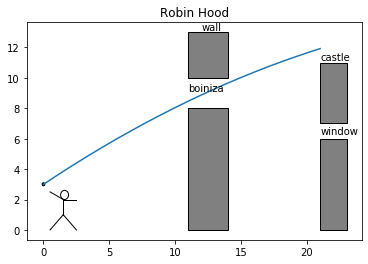

You lose


In [56]:
%matplotlib inline

import os
from matplotlib.path import Path
import math as math
from matplotlib.patches import PathPatch
import matplotlib.patches as pat
import matplotlib.lines as lines
import matplotlib.text as text
from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np

#данные для формул
g = 9.8 #сила тяготения
m = 10 #масса камня
a = 30 #угол броска в градусах
a = (a*math.pi)/180 #переводим его в радианы
x0 = 0 #начало броска по х
y0 = 3 #начало броска по y
v0 = 30 #скорость броска

#данные для рисования графиков
wall_sdvig = 0 #сдвиг стены от Робин Гуда
w_wall = 0 #толщина стены
zemly_boi = 0 #расстояние от земли до бойницы
hei_boi = 0 #высота бойницы
wall_castle = 0 #расстояние от стены до замка
zemly_window = 0 #расстояние от земли до окна замка
hei_window = 0 #высота окна
w_castle = 4 #ширина замка

#функция, рисующая стены, человека и траекторию камня
def walldraw(a, v0, m, wall_sdvig, w_wall, zemly_boi, hei_boi, wall_castle, zemly_window, hei_window):
    
    land = False #попадание

    vertices = []
    codes = []

    codes = [Path.MOVETO] + [Path.LINETO]*3 + [Path.CLOSEPOLY] #wall down
    vertices = [(11+wall_sdvig, 0), (14+wall_sdvig+w_wall, 0), (14+wall_sdvig+w_wall, 8+zemly_boi), (11+wall_sdvig, 8+zemly_boi), (0, 0)]

    codes += [Path.MOVETO] + [Path.LINETO]*3 + [Path.CLOSEPOLY] #wall up
    vertices += [(11+wall_sdvig, 10+zemly_boi+hei_boi), (14+wall_sdvig+w_wall, 10+zemly_boi+hei_boi), (14+wall_sdvig+w_wall, 13+zemly_boi+hei_boi), (11+wall_sdvig, 13+zemly_boi+hei_boi), (0, 0)]

    codes += [Path.MOVETO] + [Path.LINETO]*3 + [Path.CLOSEPOLY] #castle down
    vertices += [(21+wall_sdvig+wall_castle, 0), (23+wall_sdvig+wall_castle, 0), (23+wall_sdvig+wall_castle, 6+zemly_window), (21+wall_sdvig+wall_castle, 6+zemly_window), (0, 0)]

    codes += [Path.MOVETO] + [Path.LINETO]*3 + [Path.CLOSEPOLY] #castle up
    vertices += [(21+wall_sdvig+wall_castle, 7+zemly_window+hei_window), (23+wall_sdvig+wall_castle, 7+zemly_window+hei_window), (23+wall_sdvig+wall_castle, 11+zemly_window+hei_window), (21+wall_sdvig+wall_castle, 11+zemly_window+hei_window), (0, 0)]

    vertices = np.array(vertices, float)
    path = Path(vertices, codes)

    pathpatch = PathPatch(path, facecolor='gray', edgecolor='black')

    line = lines.Line2D([0.5, 1.5], [0, 1], lw=1, color='black') #left leg
    line1 = lines.Line2D([2.5, 1.5], [0, 1], lw=1, color='black') #right leg
    line2 = lines.Line2D([1.5, 1.5], [1, 2], lw=1, color='black') #body
    line3 = lines.Line2D([1.5, 0.5], [2, 2.5], lw=1, color='black') #up left arm
    line4 = lines.Line2D([1.5, 2.5], [2, 2], lw=1, color='black') #right arm
    c = pat.Circle((1.6, 2.3), radius = 0.3, edgecolor='black', facecolor='None') #head
    b = pat.Circle((0, 3), radius = 0.1, edgecolor='black', facecolor='black') #rock

    boi = text.Text(11+wall_sdvig, 9+zemly_boi+hei_boi, 'boiniza', ha='left', va='bottom', color='black') #text boiniza
    w = text.Text(21+wall_sdvig+wall_castle, 6.15+zemly_window+hei_window, 'window', ha='left', va='bottom', color='black') #text window
    wall = text.Text(12+wall_sdvig, 13+zemly_boi+hei_boi, 'wall', ha='left', va='bottom', color='black') #text wall
    castle = text.Text(21+wall_sdvig+wall_castle, 11+zemly_window+hei_window, 'castle', ha='left', va='bottom', color='black') #text castle
    
    wall_start = 11 + wall_sdvig #начало стены по х
    wall_end = wall_start + w_wall #конец стены по х
    castle_start = 21 + wall_sdvig + wall_castle #начало замка по х
    boi_start = 8 + zemly_boi #начало бойницы по у
    boi_start_x = 14 + wall_sdvig + w_wall #начало бойницы по у
    boi_end = 10 + zemly_boi + hei_boi #конец бойницы
    boi_wid = 14 + wall_sdvig + w_wall - 11 + wall_sdvig #ширина бойницы
    win_start = 6 + zemly_window #начало окна
    win_end = 7 + zemly_window+hei_window #конец окна
    castle_end = castle_start + w_castle
    castle_end_y = 11 + zemly_window + hei_window #высота замка
    wall_end_y = 13 + zemly_boi+hei_boi #высота стены
    
    ###вычисление траектории
    
    #х координата точки в t момент времени
    def xt(t, x0, vx):
        return x0 + vx*t

    #y координата точки в t момент времени
    def yt(t, y0, vy):
        return y0 + vy*t - g*(t**2)/ 2
    
    #момент времени, когда камень в координате х
    def tx(x, x0, vx):
        return (x - x0)/vx
    
    #момент времени, когда камень в координатах у
    def ty(y, y0, vy):
        return (vy - math.sqrt(vy**2 + 2*g*(y0 - y))) / g, (vy + math.sqrt(vy**2 + 2*g*(y0 - y)))/g
    
    #верхняя точке траектории
    def tmax(vy):
        return vy/g
    
    #проекция начальной скорости
    vx = v0 * np.cos(a)
    vy = v0 * np.sin(a)
    
    t_x = tx(wall_start, x0, vx) #время при достижении начала стены
    x_wall_start = xt(t_x, x0, vx) #вычисление точных координат при достижении стены
    y_wall_start = yt(t_x, y0, vy) #
    
    t_x = tx(wall_end, x0, vx) #время при прохождении стены
    x_wall_end = xt(t_x, x0, vx) #вычисление точных координат при прохождении конца стены
    y_wall_end = yt(t_x, y0, vy) #
    
    t_x = tx(castle_start, x0, vx) #время при достижении начала замка
    x_castle_start = xt(t_x, x0, vx) #вычисление точных координат при достижении начала замка
    y_castle_start = yt(t_x, y0, vy) #
    
    tm = tmax(vy) #выисление максимальной точки траектории
    xmax = xt(tm, x0, vx) #точные координаты
    ymax = yt(tm, y0, vy) #
    
    ##условие для событий
    if y_wall_start < hei_boi: #летит ниже бойницы
        t_y = ty(0, y0, vy)[1]
        if xt(t_y, x0, vx) < wall_start: #не долетел до стены
            tra = np.linspace(0, t_y, 500)
        else: #попал в стену
            tra = np.linspace(0, tx(wall_start, x0, vx), 500)
            
    elif y_wall_start > wall_end_y: #летит выше бойницы
        tra = np.linspace(0, tx(wall_start, x0, vx), 500)
        
    elif y_wall_end < boi_start: #попал на бойницу
        tra = np.linspace(0, tx(boi_start, x0, vx), 500)
        
    elif y_wall_end > boi_end: #потолок бойницы
        tra = np.linspace(0, tx(wall_start, x0, vx), 500)
        
    elif y_castle_start < win_start: #ниже кона
        tra = np.linspace(0, tx(castle_start, x0, vx), 500)
    
    elif y_castle_start > win_end: #выше окна
        t_y = ty(0, y0, vy)[1]
        if xt(t_y, x0, vx) < castle_start: #не долетел до замка
             tra = np.linspace(0, t_y, 500)
        else: #попал в замок
            tra = np.linspace(0, tx(castle_start, x0, vx), 500)
    
    elif (y_wall_start > wall_end_y and y_wall_start < boi_end and y_wall_end > boi_start and y_wall_end < wall_win_top and
        xmax > wall_start and xmax < wall_end and ymax > win_end): # по траектории пролетал бойницу, но задел в ней потолок
        tra = np.linspace(0, tx(wall_end, x0, vx), 500)
    
    else: #попал в окно
        tra = np.linspace(0, tx(castle_end, x0, vx), 500)
        land = True
    
    #траектория
    xt = [xt(t, x0, vx) for t in tra]
    yt = [yt(t, y0, vy) for t in tra]

    ###вывод графиков
    fig, ax = plt.subplots()
    ax.add_line(line)
    ax.add_line(line1)
    ax.add_line(line2)
    ax.add_line(line3)
    ax.add_line(line4)
    ax.add_patch(c)
    ax.add_patch(b)
    ax.add_artist(boi)
    ax.add_artist(w)
    ax.add_artist(wall)
    ax.add_artist(castle)
    ax.add_patch(pathpatch)
    ax.set_title('Robin Hood')
    ax.autoscale_view()
    
    ax.plot(xt, yt)

    plt.show()
    
    return land

wall = walldraw(a, v0, m, wall_sdvig, w_wall, zemly_boi, hei_boi, wall_castle, zemly_window, hei_window)

if wall:
    print("You win")
else:
    print("You lose")

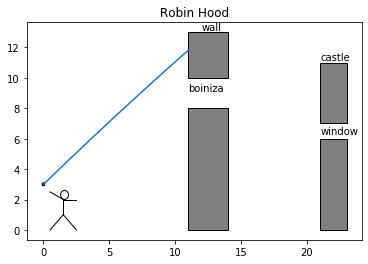

You lose


In [10]:
m = 8 #масса камня
a = 40 #угол броска в градусах
a = (a*math.pi)/180 #переводим его в радианы
v0 = 50 #скорость броска

wall = walldraw(a, v0, m, wall_sdvig, w_wall, zemly_boi, hei_boi, wall_castle, zemly_window, hei_window)

if wall:
    print("You win")
else:
    print("You lose")

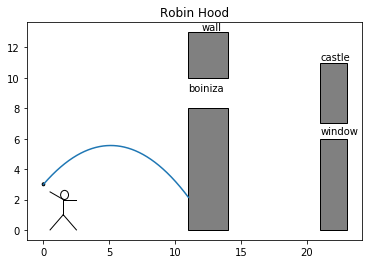

You lose


In [11]:
m = 3 #масса камня
a = 45 #угол броска в градусах
a = (a*math.pi)/180 #переводим его в радианы
v0 = 10 #скорость броска

wall = walldraw(a, v0, m, wall_sdvig, w_wall, zemly_boi, hei_boi, wall_castle, zemly_window, hei_window)

if wall:
    print("You win")
else:
    print("You lose")

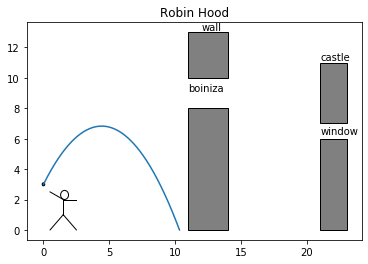

You lose


In [21]:
m = 10 #масса камня
a = 60 #угол броска в градусах
a = (a*math.pi)/180 #переводим его в радианы
v0 = 10 #скорость броска

wall = walldraw(a, v0, m, wall_sdvig, w_wall, zemly_boi, hei_boi, wall_castle, zemly_window, hei_window)

if wall:
    print("You win")
else:
    print("You lose")

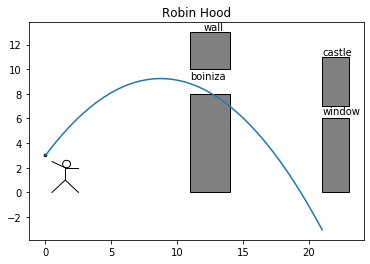

You lose


In [42]:
m = 10 #масса камня
a = 55 #угол броска в градусах
a = (a*math.pi)/180 #переводим его в радианы
v0 = 13.5 #скорость броска

wall = walldraw(a, v0, m, wall_sdvig, w_wall, zemly_boi, hei_boi, wall_castle, zemly_window, hei_window)

if wall:
    print("You win")
else:
    print("You lose")

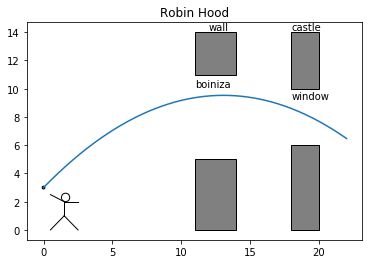

You win


In [57]:
m = 10 #масса камня
a = 45 #угол броска в градусах
a = (a*math.pi)/180 #переводим его в радианы
v0 = 16 #скорость броска

wall_sdvig = 0 #сдвиг стены от Робин Гуда
w_wall = 0 #толщина стены
zemly_boi = -3 #расстояние от земли до бойницы
hei_boi = 4 #высота бойницы
wall_castle = -3 #расстояние от стены до замка
zemly_window = 0 #расстояние от земли до окна замка
hei_window = 3 #высота окна

wall = walldraw(a, v0, m, wall_sdvig, w_wall, zemly_boi, hei_boi, wall_castle, zemly_window, hei_window)

if wall:
    print("You win")
else:
    print("You lose")

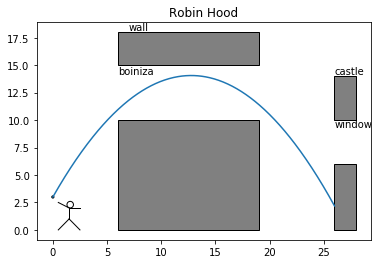

You lose


In [58]:
m = 10 #масса камня
a = 60 #угол броска в градусах
a = (a*math.pi)/180 #переводим его в радианы
v0 = 17 #скорость броска

wall_sdvig = -5 #сдвиг стены от Робин Гуда
w_wall = 10 #толщина стены
zemly_boi = 2 #расстояние от земли до бойницы
hei_boi = 3 #высота бойницы
wall_castle = 10 #расстояние от стены до замка
zemly_window = 0 #расстояние от земли до окна замка
hei_window = 3 #высота окна

wall = walldraw(a, v0, m, wall_sdvig, w_wall, zemly_boi, hei_boi, wall_castle, zemly_window, hei_window)

if wall:
    print("You win")
else:
    print("You lose")

Дополнительные источники информации:

1) https://matplotlib.org/3.2.1/gallery/units/artist_tests.html#sphx-glr-gallery-units-artist-tests-py
2) https://matplotlib.org/3.2.1/gallery/shapes_and_collections/compound_path.html#sphx-glr-gallery-shapes-and-collections-compound-path-py
3) https://www.youtube.com/watch?v=jMBimQnhQNw
4) 09. Дифференциальные уравнения.ipynb
5) https://glebgrenkin.blogspot.com/2014/03/blog-post.html